# Load Data Set

In [2]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
import random
import pickle
%matplotlib inline


In [3]:
df = pd.read_csv("pharmacyClean.csv")

del df["Unnamed: 0"]
df.head()

,diagnosis,drug,bin,pcn,rejected,patient_pay,drug_group,drug_type,drug_class
0,G99.93,branded tanoclolol,725700,1UQC,False,13.39,branded,tanoclolol,lol
1,U60.52,branded oxasoted,664344,pcn_2,False,7.02,branded,oxasoted,ted
2,Q85.91,branded cupitelol,725700,1UQC,False,13.39,branded,cupitelol,lol
3,U60.52,generic oxasoted,571569,KB38N,False,10.84,generic,oxasoted,ted
4,N55.01,branded mamate,664344,pcn_13,False,47.00,branded,mamate,ate


Save the rows that have a co-pay

In [4]:
df_accepted = df.loc[df['rejected']==False]

Split the data set

In [5]:
random.seed(104)
df_train, df_test = train_test_split(df_accepted.copy(),
                                          shuffle=True,
                                          random_state=107,
                                          test_size=.2)

## Models

In [6]:
## Import KFold
from sklearn.model_selection import KFold

## Import Models for Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

## Import Mean Squared Error
from sklearn.metrics import mean_squared_error as mse


In [7]:
final_results =[]

## Baseline

In [8]:
## make empty mse holder
baseline_cv_mses = []

prediction = np.mean(df_train.patient_pay)*np.ones((len(df_train.patient_pay),1))

baseline_cv_mses.append(mse(df_train.patient_pay,prediction))


In [9]:
baseline_mse = np.mean(baseline_cv_mses)
final_results.append(['baseline',np.sqrt(baseline_mse)])
print("The baseline MSE is",baseline_mse)
print()
print("The baseline RMSE is", np.sqrt(baseline_mse))


The baseline MSE is 1642.9815465752806

The baseline RMSE is 40.533708769063814


One average the predictions are $40 off for the copay



## Best Subset Selection

In [11]:
#Hot one encode the training set
df_train_hot = pd.DataFrame()

In [ ]:
n=len(df_train_hot.columns)

In [ ]:
models =['baseline',
         ['drug_group', 'drug_type'],
         ['pcn', 'drug_type'],
         ['drug_group', 'pcn'],
         ['drug_group', 'diagnosis'],
         ['diagnosis', 'drug_type'],
         ['diagnosis', 'pcn'],
         ['pcn', 'drug_type','drug_group'],
         ['diagnosis', 'drug_type','drug_group'],
        ['drug_group', 'drug_type', 'pcn', 'diagnosis'],
         ]

In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=5643)
cv_mses_lr = np.zeros((kfold.n_splits, len(models)))
cv_mses_dtr = np.zeros((kfold.n_splits, len(models)))

i = 0
for train_index, test_index in kfold.split(df_train):
    df_tt = df_train.iloc[train_index]
    df_ho = df_train.iloc[test_index]
    
    j = 0
    for model in models:
        if model == "baseline":
            train_mean = df_tt.patient_pay.mean()
            cv_mses_lr[i,j] = mse(df_ho.patient_pay, train_mean*np.ones(len(df_ho)))
            cv_mses_dtr[i,j] = cv_mses_lr[i,j]
            #cv_mses_rfr[i,j] = cv_mses_lr[i,j]
        else:
          one_hot_tt = pd.DataFrame()
          one_hot_ho = pd.DataFrame()
          for col in model:
              one_hot_tt[df_tt[col].unique()] = pd.get_dummies(df_tt[col])[df_tt[col].unique()]
              one_hot_ho[df_tt[col].unique()] = pd.get_dummies(df_ho[col])[df_tt[col].unique()]
            
            # The hold out and train data do not contain all necessary values for some particular column
          if one_hot_tt.shape[1] != one_hot_ho.shape[1]:
              continue 
            
          slr = LinearRegression(copy_X = True)        
          slr.fit(one_hot_tt, df_tt.patient_pay)
          cv_mses_lr[i,j] = mse(df_ho.patient_pay, slr.predict(one_hot_ho))
          
          
          dtr = DecisionTreeRegressor()        
          dtr.fit(one_hot_tt, df_tt.patient_pay)
          cv_mses_dtr[i,j] = mse(df_ho.patient_pay, dtr.predict(one_hot_ho))
            
            
#             rfr = RandomForestRegressor()        
#             rfr.fit(one_hot_tt, df_tt.patient_pay)
#             cv_mses_rfr[i,j] = mse(df_ho.patient_pay, rfr.predict(one_hot_ho))
        j = j + 1
        print('Done with model ' + str(j) + ' for split ' + str(i) )
    i = i + 1

Done with model 1 for split 0
Done with model 2 for split 0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 3 for split 0
Done with model 4 for split 0
Done with model 5 for split 0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 6 for split 0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 7 for split 0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 8 for split 0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 9 for split 0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 10 for split 0
Done with model 1 for split 1
Done with model 2 for split 1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 3 for split 1
Done with model 4 for split 1
Done with model 5 for split 1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 6 for split 1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 7 for split 1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 8 for split 1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 9 for split 1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 10 for split 1
Done with model 1 for split 2
Done with model 2 for split 2


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 3 for split 2
Done with model 4 for split 2
Done with model 5 for split 2


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 6 for split 2


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 7 for split 2


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 8 for split 2


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 9 for split 2


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


Done with model 10 for split 2


In [ ]:
cv_mses_lr

array([[2.00608377e+03, 4.42584658e+02, 3.65105430e+02, 1.73794481e+03,
        9.69374147e+02, 6.00256517e+19, 9.42427909e+02, 3.62658290e+02,
        1.48039383e+19, 4.35840139e+21],
       [1.95445685e+03, 4.49456880e+02, 3.71179970e+02, 1.68906636e+03,
        9.15853082e+02, 4.52731309e+02, 8.92396425e+02, 3.68396228e+02,
        4.49691950e+02, 3.68544781e+02],
       [1.90203544e+03, 4.62184911e+02, 3.81584361e+02, 1.63878355e+03,
        9.23809540e+02, 4.66371408e+02, 8.97043739e+02, 3.78876860e+02,
        4.63692158e+02, 3.80248630e+02]])

In [ ]:
cv_mses_dtr

array([[2006.08376685,  437.8932615 ,   42.23408518, 1704.21010116,
         904.98287838,  450.41142196,  774.22844557,   30.01236568,
         442.81767212,   40.89456025],
       [1954.45684693,  444.65913826,   45.09367252, 1655.86802243,
         852.87831321,  454.42492221,  761.77653162,   31.90069445,
         446.62471009,   45.80462118],
       [1902.03544042,  457.36961286,   46.24287097, 1605.43449256,
         866.25255712,  470.20297174,  747.56075938,   33.53111501,
         462.93021329,   38.63935863]])

In [ ]:
lr_mean = np.mean(cv_mses_lr, axis=0)
np.sqrt(lr_mean)

array([4.42062441e+01, 2.12463836e+01, 1.93034519e+01, 4.10925570e+01,
       3.05997645e+01, 4.47309183e+09, 3.01765255e+01, 1.92347895e+01,
       2.22140633e+09, 3.81156197e+10])

In [ ]:
dtr_mean = np.mean(cv_mses_dtr, axis=0)
np.sqrt(dtr_mean)

array([44.20624411, 21.13387496,  6.67259641, 40.68379127, 29.57540503,
       21.40902704, 27.58964623,  5.64045433, 21.23183612,  6.4637074 ])

The best split is ['drug_group', 'pcn', 'drug_type'] for both models.

## Hot One Encoded Data Frame with the Three Features

In [10]:
model = ['drug_group', 'pcn', 'drug_type']
one_hot_train = pd.DataFrame()
one_hot_test = pd.DataFrame()
for col in model:
    one_hot_train[df_train[col].unique()] = pd.get_dummies(df_train[col])[df_train[col].unique()]
    one_hot_test[df_train[col].unique()] = pd.get_dummies(df_test[col])[df_train[col].unique()]

# Create Full Regression Tree

In [11]:
dtr = DecisionTreeRegressor()        
dtr.fit(one_hot_train, df_train.patient_pay)

DecisionTreeRegressor()

In [12]:
splits = dtr.get_depth()

In [13]:
pred = dtr.predict(one_hot_test)

[Text(0.6363636363636364, 0.9, 'X[116] <= 0.5\nsquared_error = 1642.982\nsamples = 10258707\nvalue = 26.104'),
 Text(0.36363636363636365, 0.7, 'X[0] <= 0.5\nsquared_error = 1308.076\nsamples = 10239062\nvalue = 25.375'),
 Text(0.18181818181818182, 0.5, 'X[79] <= 0.5\nsquared_error = 25.819\nsamples = 4118701\nvalue = 11.517'),
 Text(0.09090909090909091, 0.3, 'X[123] <= 0.5\nsquared_error = 21.058\nsamples = 4002052\nvalue = 11.219'),
 Text(0.045454545454545456, 0.1, '\n  (...)  \n'),
 Text(0.13636363636363635, 0.1, '\n  (...)  \n'),
 Text(0.2727272727272727, 0.3, 'X[3] <= 0.5\nsquared_error = 81.668\nsamples = 116649\nvalue = 21.738'),
 Text(0.22727272727272727, 0.1, '\n  (...)  \n'),
 Text(0.3181818181818182, 0.1, '\n  (...)  \n'),
 Text(0.5454545454545454, 0.5, 'X[91] <= 0.5\nsquared_error = 1954.769\nsamples = 6120361\nvalue = 34.701'),
 Text(0.45454545454545453, 0.3, 'X[88] <= 0.5\nsquared_error = 1772.799\nsamples = 6062637\nvalue = 33.497'),
 Text(0.4090909090909091, 0.1, '\n  (.

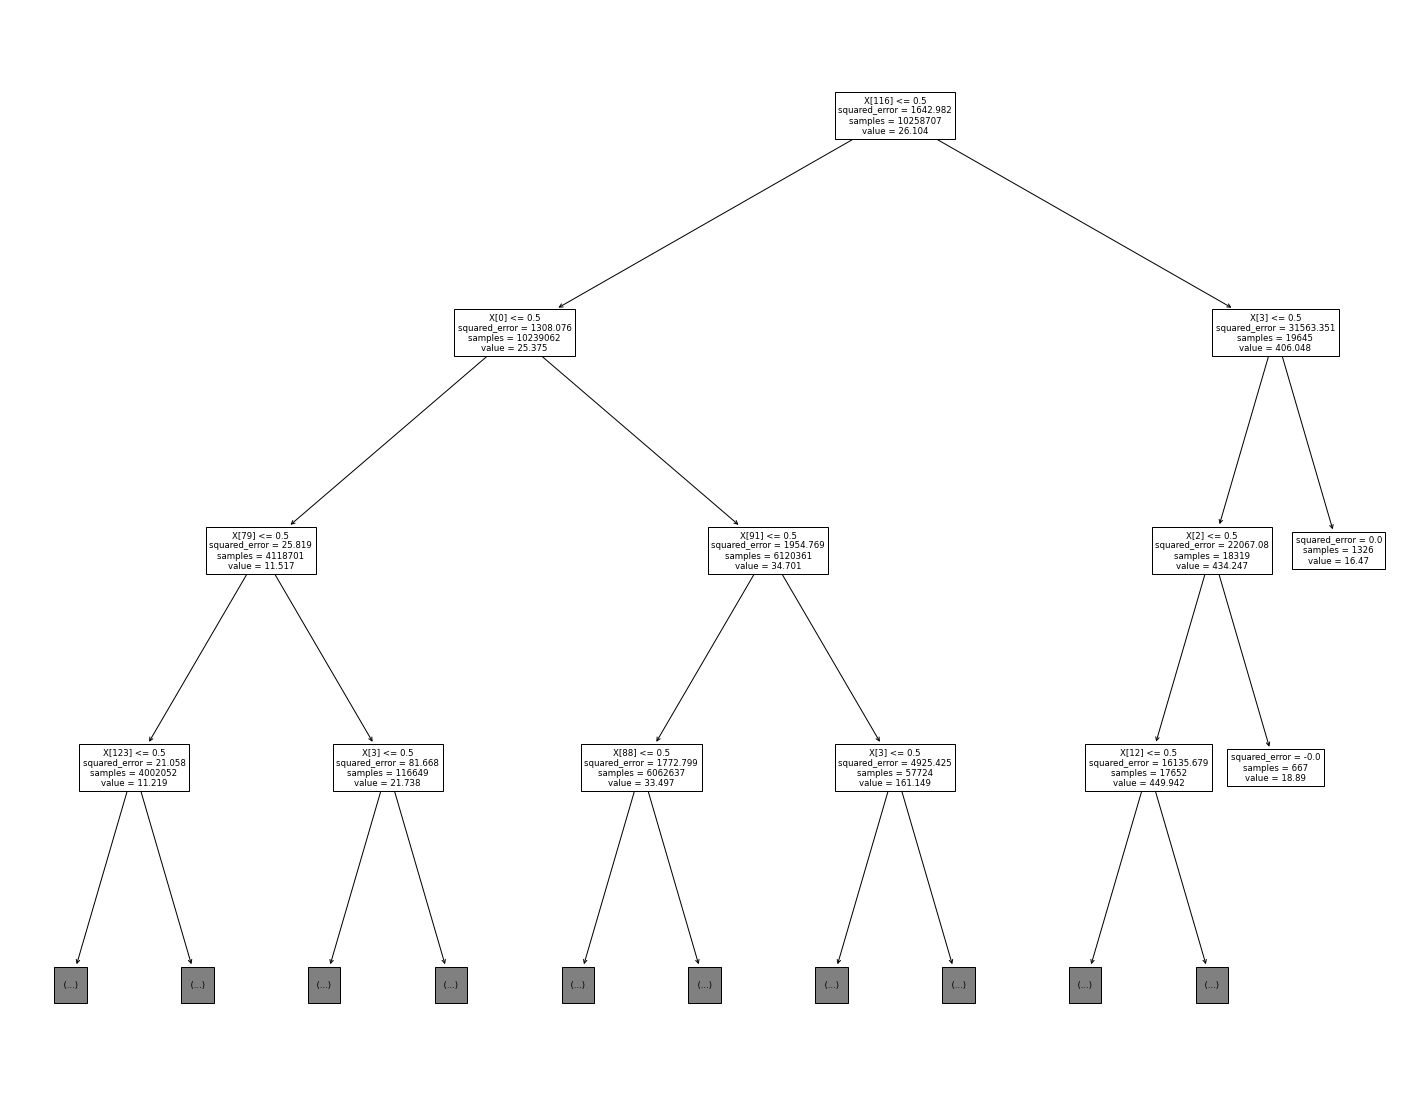

In [13]:
fig = plt.figure(figsize=(25,20))
plot_tree(dtr, max_depth=3)

In [14]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Feature Importance:

In [15]:
et_score_df = pd.DataFrame({'feature':one_hot_train.columns,
                            'importance_score': dtr.feature_importances_})

et_score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
116,monemodiase,1.692226e-01
0,branded,7.880841e-02
3,pcn_7,6.659638e-02
91,tugesutin,5.549211e-02
88,diadaric,5.332667e-02
...,...,...
132,lixegimoric,2.604667e-05
70,cibroniudosin,2.079874e-05
96,cupitelol,5.649456e-06
139,gohevitravir,4.294906e-07


Compute the Test RMSE

In [14]:
tree_RMSE = np.sqrt(mse(pred,df_test.patient_pay))
final_results.append(['Tree', tree_RMSE])
print("The RMSE of the full tree is ",tree_RMSE) 

The RMSE of the full tree is  2.4989298489682823


# The RMSE of the full tree is 2.49

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=5643)
cv_mses_pruned_dtr = np.zeros((kfold.n_splits,splits))

i = 0
for train_index, test_index in kfold.split(df_train):
    df_tt = one_hot_train.iloc[train_index]
    y_train = df_train.patient_pay.iloc[train_index]
    df_ho = one_hot_train.iloc[test_index]
    y_test = df_train.patient_pay.iloc[test_index]
    

    for d in range(1,splits):
          dtr = DecisionTreeRegressor(max_depth=d)        
          dtr.fit(df_tt, y_train)
          cv_mses_pruned_dtr[i,d] = mse(y_test.values, dtr.predict(df_ho))

    i = i + 1

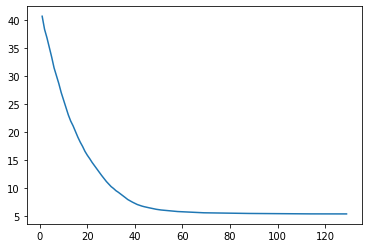

In [ ]:
plt.plot(range(1,splits),np.sqrt(np.mean(cv_mses_pruned_dtr, axis=0))[1:,])
plt.show()

The best split ends up being the full tree, however the difference ends up not being much different after having a depth of 40.


In [ ]:
(np.sqrt(np.mean(cv_mses_pruned_dtr, axis=0))[41,] - np.sqrt(np.mean(cv_mses_pruned_dtr, axis=0))[129,])/np.sqrt(np.mean(cv_mses_pruned_dtr, axis=0))[41,]

0.23892976544639796

The full tree is $1.67 better than predicting and reduced the RMSE by 23% compared to the pruned tree with a depth of 40. Therefore the full tree is the best tree model.

In [15]:
#Save the final model:
filename = 'regression_tree_model.sav'
pickle.dump(dtr, open(filename, 'wb'))

## LSLR

In [16]:
slr = LinearRegression(copy_X = True)        
slr.fit(one_hot_train, df_train.patient_pay)

LinearRegression()

In [17]:
cv_mses_lr= mse(df_test.patient_pay, slr.predict(one_hot_test))

In [18]:
print("Linear Regression had a test RMSE of ", np.sqrt(cv_mses_lr))

Linear Regression had a test RMSE of  17.471126331950614


In [20]:
LR_RMSE = np.sqrt(cv_mses_lr)
final_results.append(['Linear Regression', LR_RMSE])

#Save the final model:
filename = 'linear_regression_model.sav'
pickle.dump(slr, open(filename, 'wb'))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
n = int(np.ceil(np.sqrt(one_hot_train.shape[1])))
regressor = RandomForestRegressor(n_estimators = n, random_state = 107)

In [22]:
regressor.fit(one_hot_train, df_train.patient_pay) 

RandomForestRegressor(n_estimators=12, random_state=107)

In [23]:
pred=regressor.predict(one_hot_test)
error = np.sqrt(mse(df_test.patient_pay,pred)) #calculate rmse
print('RMSE value for the Random Forest is ', error)

RMSE value for the Random Forest is  2.4990351024250272


In [24]:
et_score_df = pd.DataFrame({'feature':one_hot_train.columns,
                            'importance_score': regressor.feature_importances_})

et_score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
116,monemodiase,1.689142e-01
0,branded,7.885671e-02
3,pcn_7,6.651111e-02
91,tugesutin,5.545371e-02
88,diadaric,5.356058e-02
...,...,...
132,lixegimoric,2.837276e-05
70,cibroniudosin,2.116685e-05
96,cupitelol,7.040673e-06
139,gohevitravir,6.495291e-07


In [25]:
final_results.append(['Random Forest', error])

#Save the final model:
filename = 'forest_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

## KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=5643)
max_neighbors = 50
knn_mse = np.zeros((kfold.n_splits,max_neighbors))
i = 0
for train_index, test_index in kfold.split(df_train):
    X_tt = one_hot_train.iloc[train_index]
    y_tt =df_train.patient_pay.iloc[train_index]
    X_ho = one_hot_train.iloc[test_index]
    y_ho = df_train.patient_pay.iloc[test_index]

    j = 0
    for k in range(20,max_neighbors+1):
        knn = KNeighborsRegressor(k)
        knn.fit(X_tt, y_tt.values)
        
        pred = knn.predict(X_ho.values)
        
        knn_mse[i,j] = mse(y_ho.values, pred)
        j+=1
    i+=1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


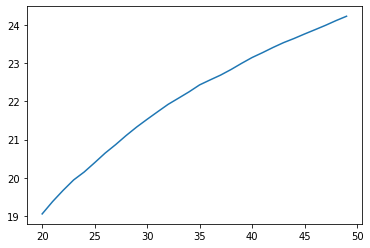

In [ ]:
plt.plot(range(20,50),np.sqrt(np.mean(knn_mse, axis=0))[0:30,])
plt.show()

## Final Results

In [31]:
results=pd.DataFrame(final_results)

In [33]:
pd.DataFrame(final_results)

,0,1
0,baseline,40.533709
1,Tree,2.498930
2,Linear Regression,17.471126
3,Random Forest,2.499035


<AxesSubplot:xlabel='0', ylabel='1'>

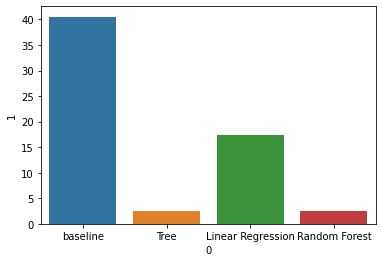

In [36]:
sns.barplot(x=results[0],y=results[1])